<h1>Deep Learning: Convolutional Neural Network (CNN) for Image Classification - Project</h1> 

<hr>
<h3>Table of Contents</h3>

[1. Import libraries](#1.-Import-libraries)

[2. Load the Data](#2.-Load-the-Data)

[3. Convolutional Neural Network:](#3.-Convolutional-Neural-Network)
- [3.1. Convolutional Neural Network Class](#3.1.-Convolutional-Neural-Network-Class)
- [3.2. Convolutional Neural Network Classifier, Criterion function, and Optimizer](#3.2.-Convolutional-Neural-Network-Classifier,-Criterion-function,-and-Optimizer)
- [3.3. Model Training](#3.3.-Model-Training)
- [3.4. Model Evaluation](#3.4.-Model-Evaluation)
  
<hr>

<h2 id="Import">1. Import libraries</h2>

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pylab as plt
import math

from utils_data.cnn_plot import plot_parameters, plot_channels, plot_activations
from utils_data.cnn_model import CNN

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">2. Load the Data</h2> 


Project Data: This project uses the MNIST dataset, a standard database of handwritten digits.<br>
Objective: The goal is the application of a Convolutional Neural Network (CNN) to classify these handwritten digits.

In [2]:
# Create a transform to resize the image
IMAGE_SIZE = 16
# Resize then convert an image to a tensor
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [3]:
# Training dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)

In [4]:
# Testing dataset
test_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

In [5]:
# The label for the fifth data element
print(train_dataset[4][1])

9


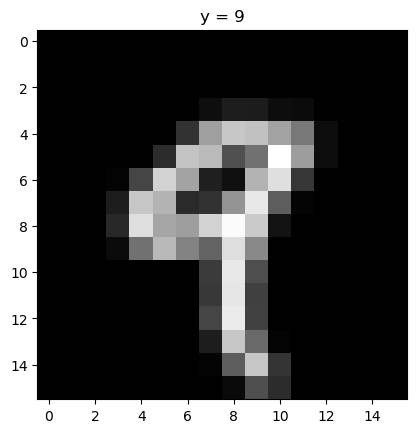

In [6]:
# The image for the fifth data element
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))
    
show_data(train_dataset[4])


<h2 id="CNN">3. Convolutional Neural Network</h2>


<h3 id="CNN_class">3.1. Convolutional Neural Network Class</h3>

We build a user-defined Convolutional Network class with two Convolutional layers and one fully connected layer. Pre-determine the size of the final output matrix. The parameters in the constructor are the number of output channels for the first and second layers.

Default Values CNN Layer:

Stride: 1
Padding: 0
Dilation: 1

Default Values Max Pool Layer:

Stride: Kernel Size
Padding: 0
Dilation: 1



<h3 id="Classifier">3.2. Convolutional Neural Network Classifier, Criterion function, and Optimizer</h3> 

In [7]:
# Create the model object using CNN class
# There are 16 output channels for the first layer, and 32 output channels for the second layer:
model = CNN(out_1=16, out_2=32)

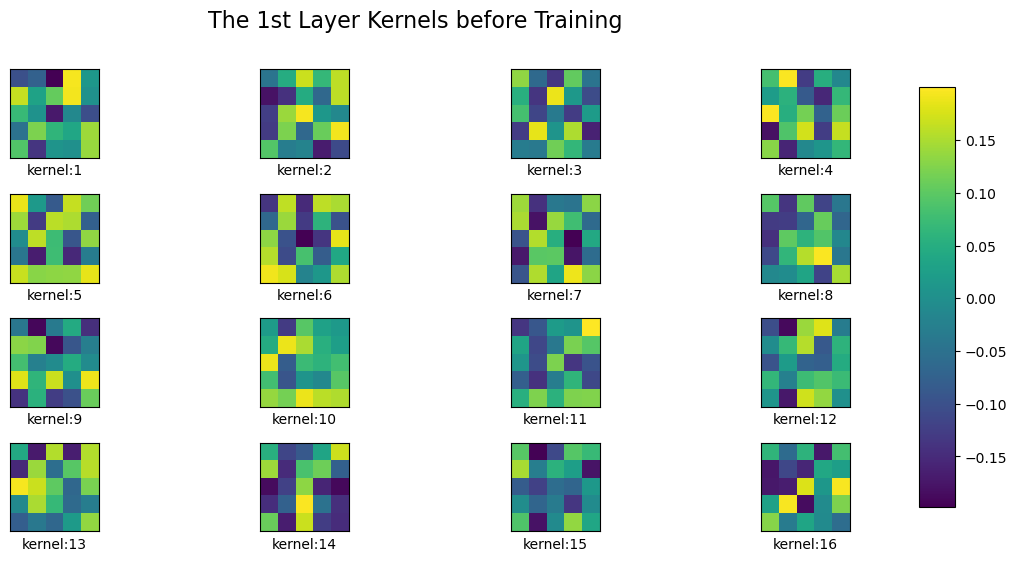

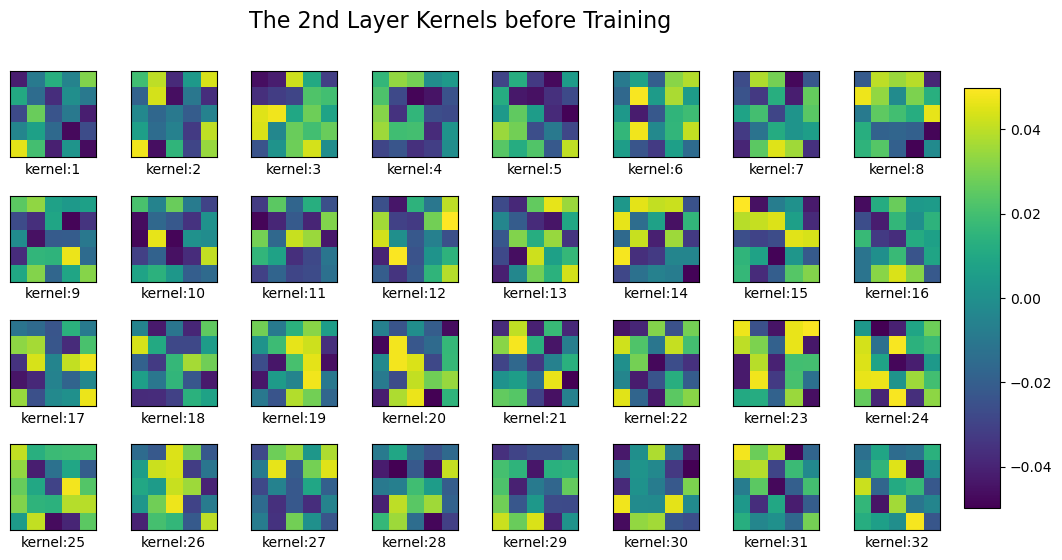

In [8]:
# Plot the model parameters for the kernels before training the kernels (The kernels are initialized randomly):
plot_parameters(model.state_dict()['cnn1.weight'], number_rows=4, name='The 1st Layer Kernels before Training')
plot_parameters(model.state_dict()['cnn2.weight'], number_rows=4, name='The 2nd Layer Kernels before Training' )

In [9]:
# Define the loss function, the optimizer, and the dataset loader
# A criterion which will measure loss
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
# An optimizer that updates model parameters using the learning rate and gradient
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
# A Data Loader for the training data with a batch size of 100 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
# A Data Loader for the validation data with a batch size of 5000 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=5000)

<h3 id="Train">3.3. Model Training</h3> 

Train the model and determine validation accuracy technically test accuracy


In [10]:
# Train the CNN model and determine validation accuracy technically test accuracy
n_epochs=3
cost_list=[]
accuracy_list=[]
N_test=len(test_dataset)

# Model Training Function
def train_model(n_epochs):

    for epoch in range(n_epochs):
        COST=0

        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            COST+=loss.data
        
        # Saves cost of training data of epoch
        cost_list.append(COST)
        # Keeps track of correct predictions
        correct=0
        # Perform a prediction on the validation  data  
        for x_test, y_test in test_loader:
            # Makes a prediction
            z = model(x_test)
            # The class with the max value is the one we are predicting
            _, yhat = torch.max(z.data, 1)
            # Checks if the prediction matches the actual value
            correct += (yhat == y_test).sum().item()
        
        # Calcualtes accuracy and saves it
        accuracy = correct / N_test
        accuracy_list.append(accuracy)

train_model(n_epochs)

<!--Empty Space for separating topics-->


<h3 id="Evaluation">3.4. Model Evaluation</h3> 

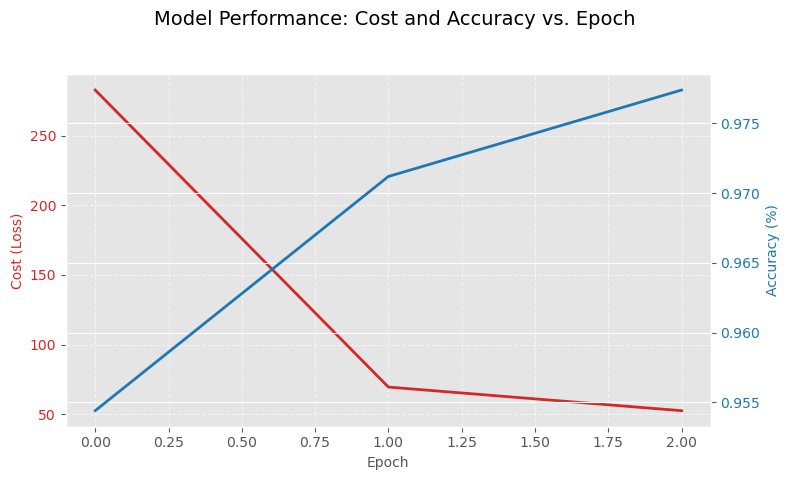

In [11]:
# Plot the Loss and Accuracy vs Epoch graph

def plot_performance(cost_list, accuracy_list):

    plt.style.use('ggplot')
    fig, ax1 = plt.subplots(figsize=(8, 5))
    fig.suptitle('Model Performance: Cost and Accuracy vs. Epoch', fontsize=14)

    color_cost = 'tab:red'
    ax1.set_xlabel('Epoch', fontsize=10)
    ax1.set_ylabel('Cost (Loss)', color=color_cost, fontsize=10)
    ax1.plot(cost_list, color=color_cost, linewidth=2, label='Cost')
    ax1.tick_params(axis='y', labelcolor=color_cost)
    ax1.grid(True, linestyle='--', alpha=0.6) 

    ax2 = ax1.twinx() 
    color_acc = 'tab:blue'
    ax2.set_ylabel('Accuracy (%)', color=color_acc, fontsize=10)
    ax2.plot(accuracy_list, color=color_acc, linewidth=2, label='Accuracy')
    ax2.tick_params(axis='y', labelcolor=color_acc)

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
plot_performance(cost_list, accuracy_list)

View the results of the parameters for the Convolutional layers 


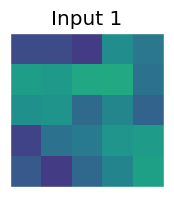

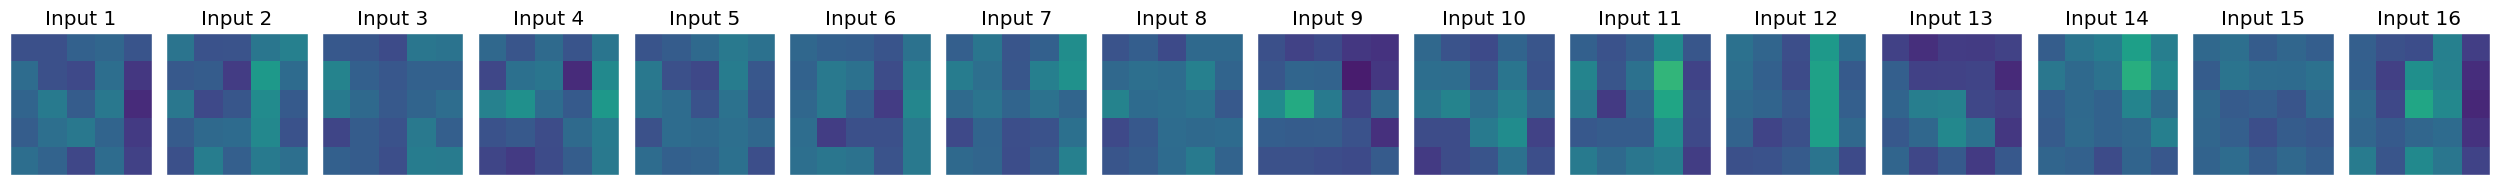

In [12]:
# Plot the channels
plot_channels(model.state_dict()['cnn1.weight'])
plot_channels(model.state_dict()['cnn2.weight'])

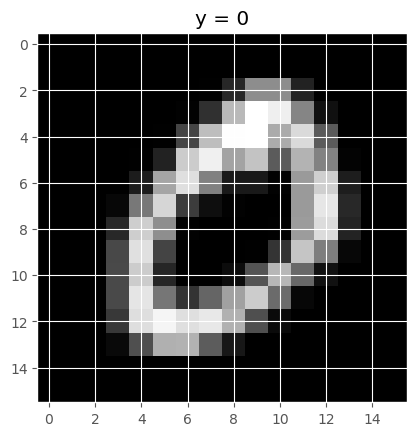

In [13]:
# Show the second image
show_data(train_dataset[1])

In [14]:
# Use the CNN activations class to see the steps
out = model.activations(train_dataset[1][0].view(1, 1, IMAGE_SIZE, IMAGE_SIZE))

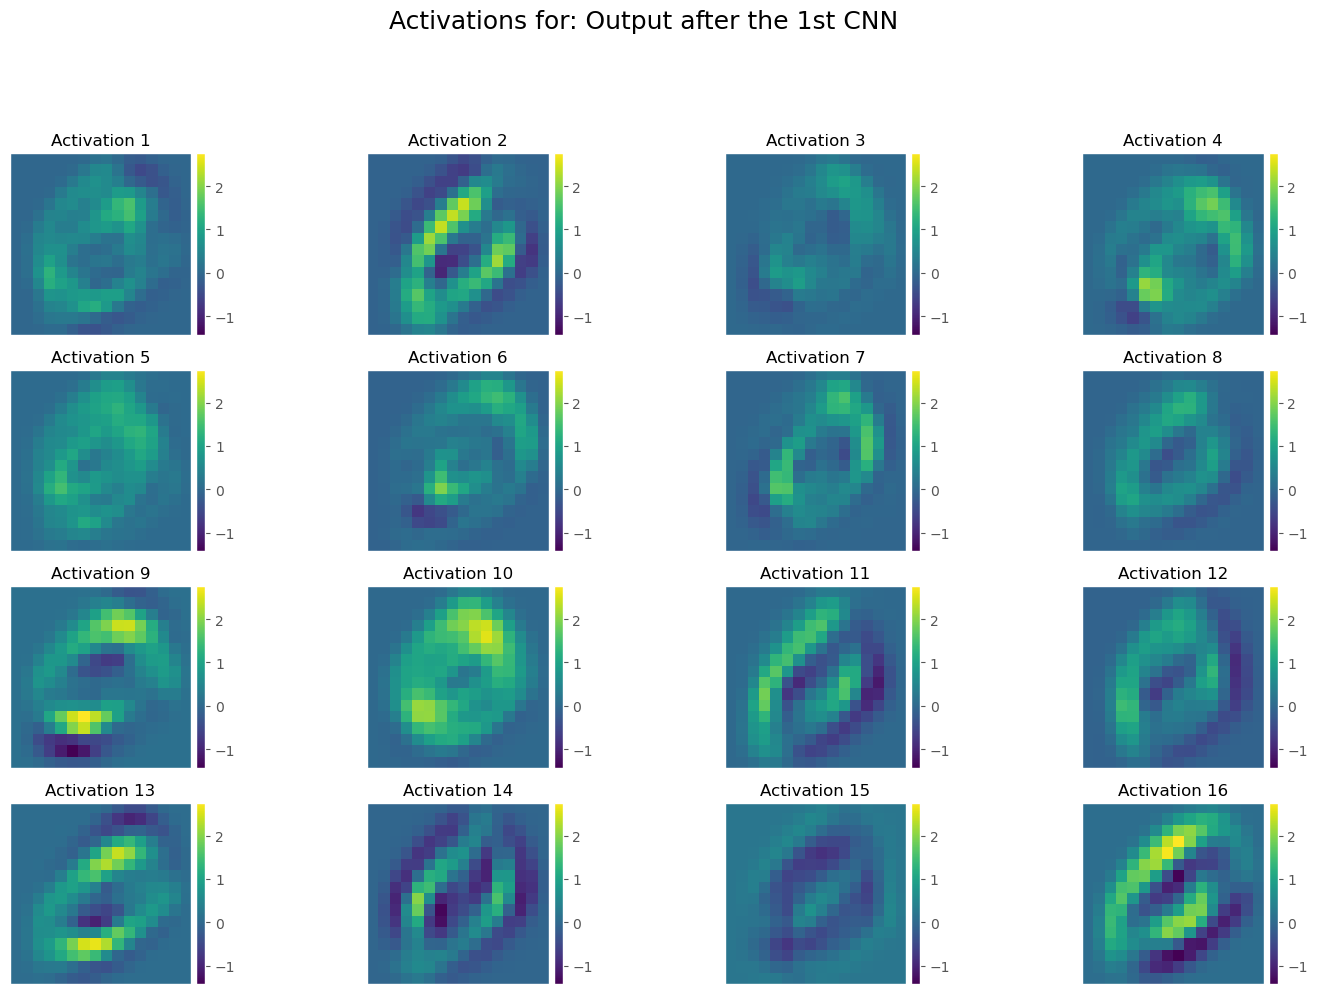

In [15]:
# Plot the outputs after the first CNN
plot_activations(out[0], number_rows=4, name="Output after the 1st CNN")

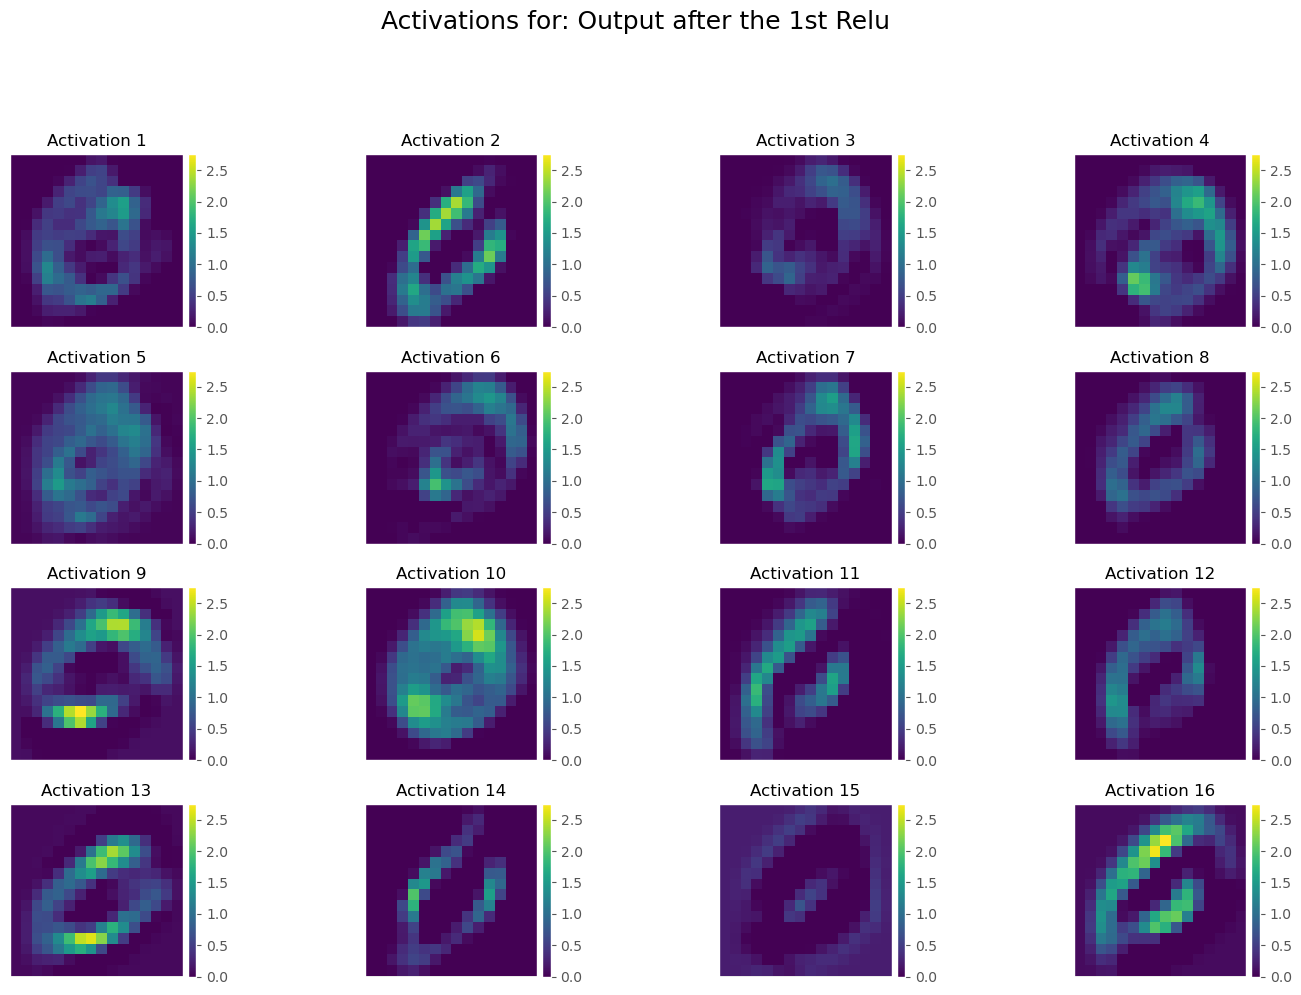

In [16]:
# Plot the outputs after the first Relu
plot_activations(out[1], number_rows=4, name="Output after the 1st Relu")

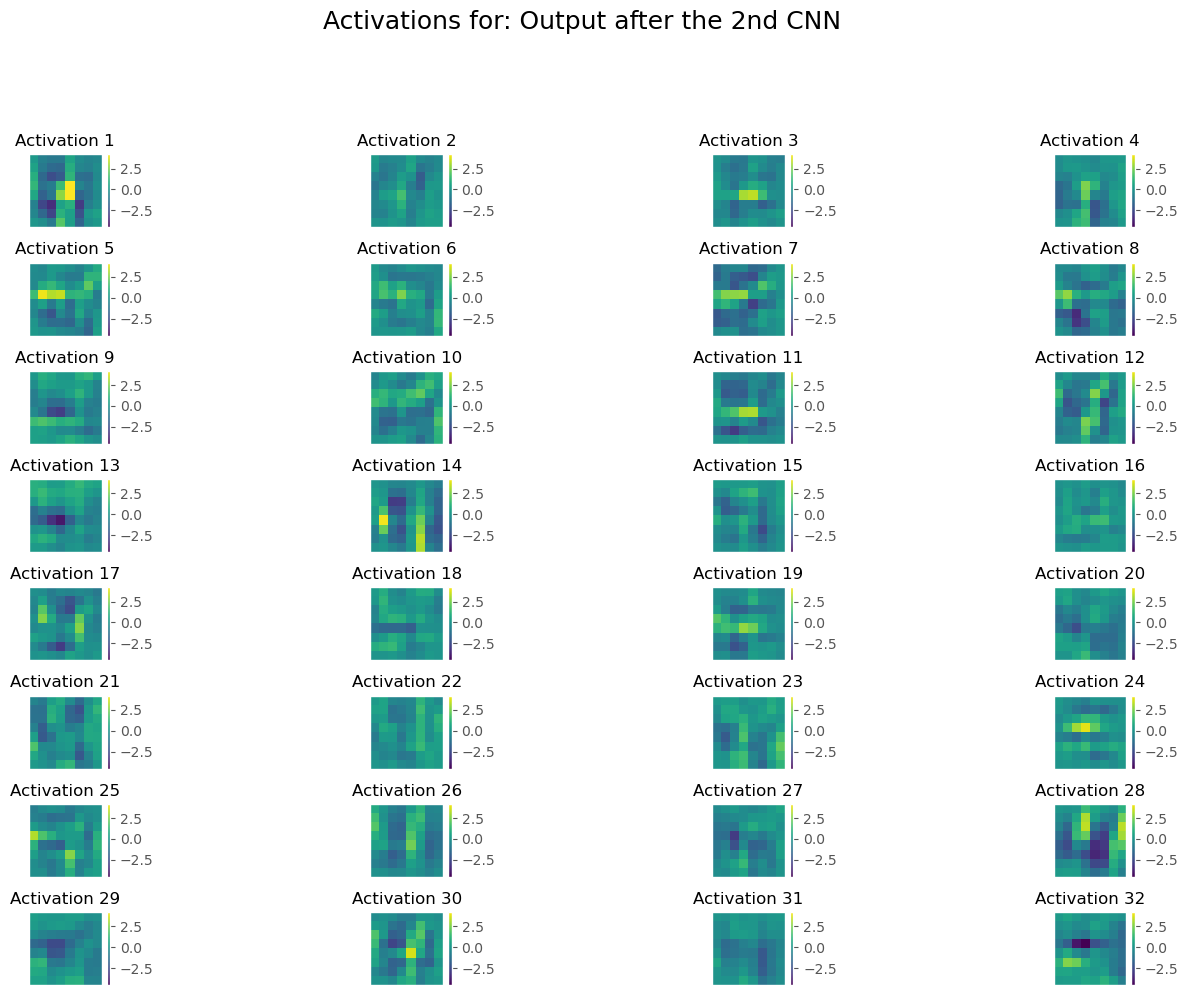

In [24]:
# Plot the outputs after the second CNN
plot_activations(out[2], number_rows=32 // 4, name="Output after the 2nd CNN")

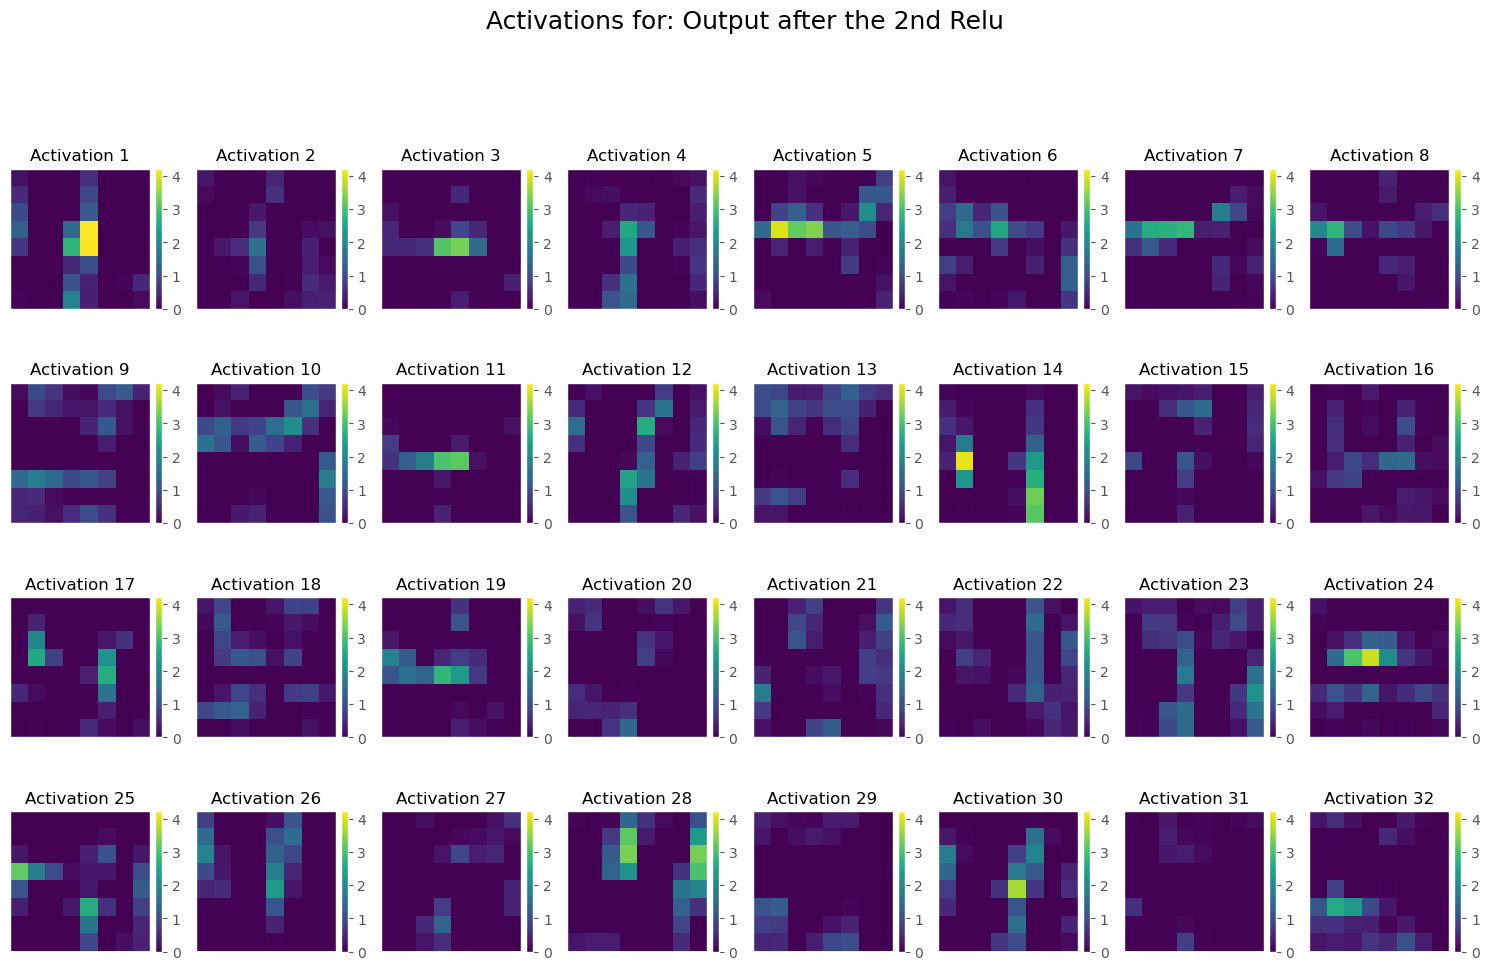

In [25]:
# Plot the outputs after the second Relu
plot_activations(out[3], number_rows=4, name="Output after the 2nd Relu")

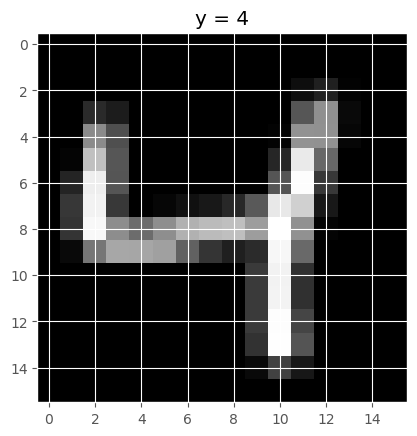

In [26]:
# Show the third image
show_data(train_dataset[2])

In [27]:
# Use the CNN activations class to see the steps
out = model.activations(train_dataset[2][0].view(1, 1, IMAGE_SIZE, IMAGE_SIZE))

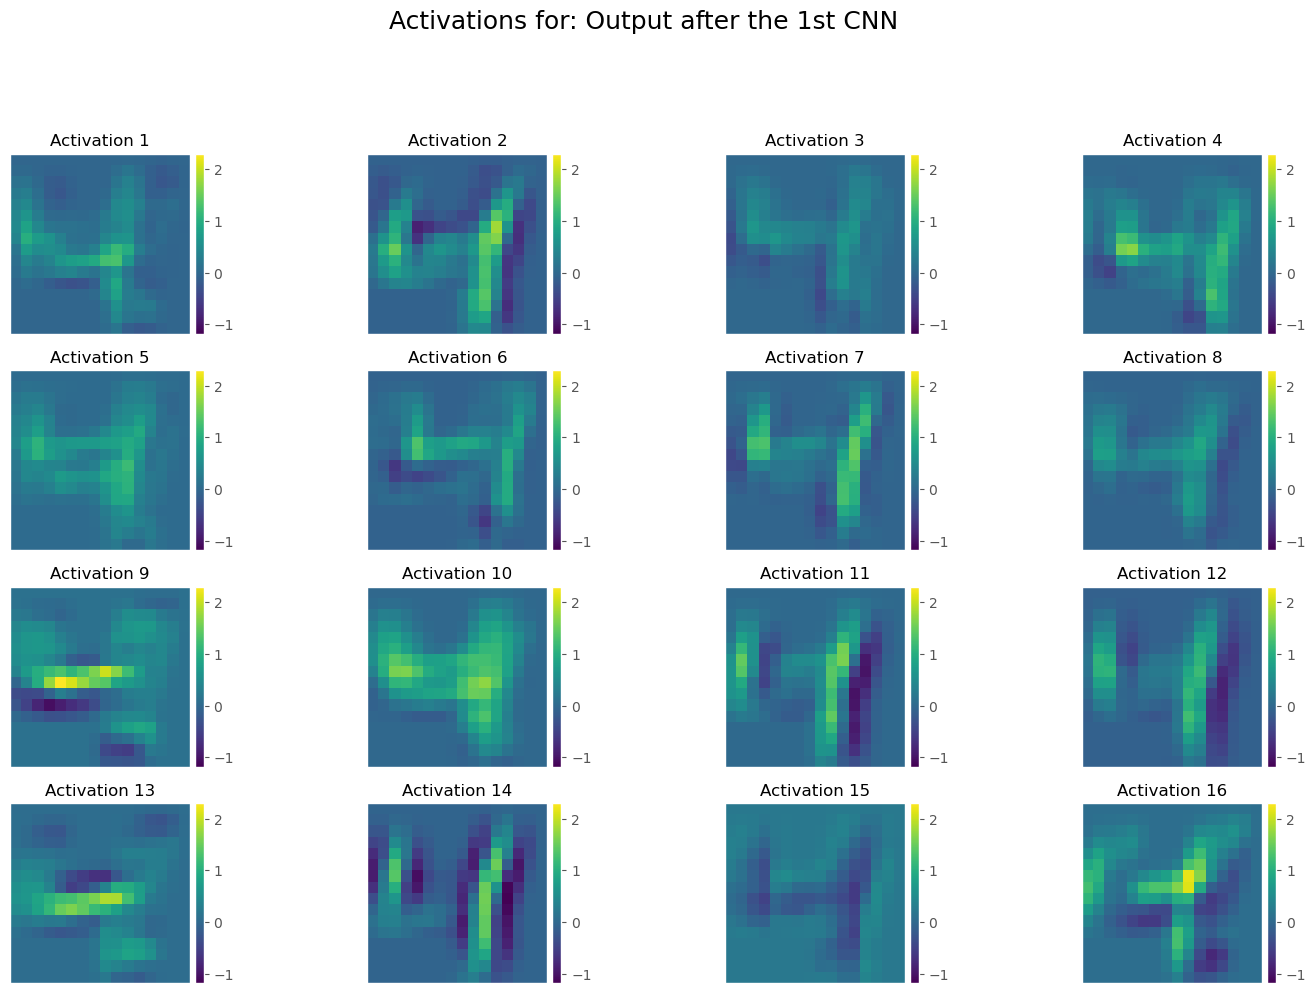

In [28]:
# Plot the outputs after the first CNN
plot_activations(out[0], number_rows=4, name="Output after the 1st CNN")

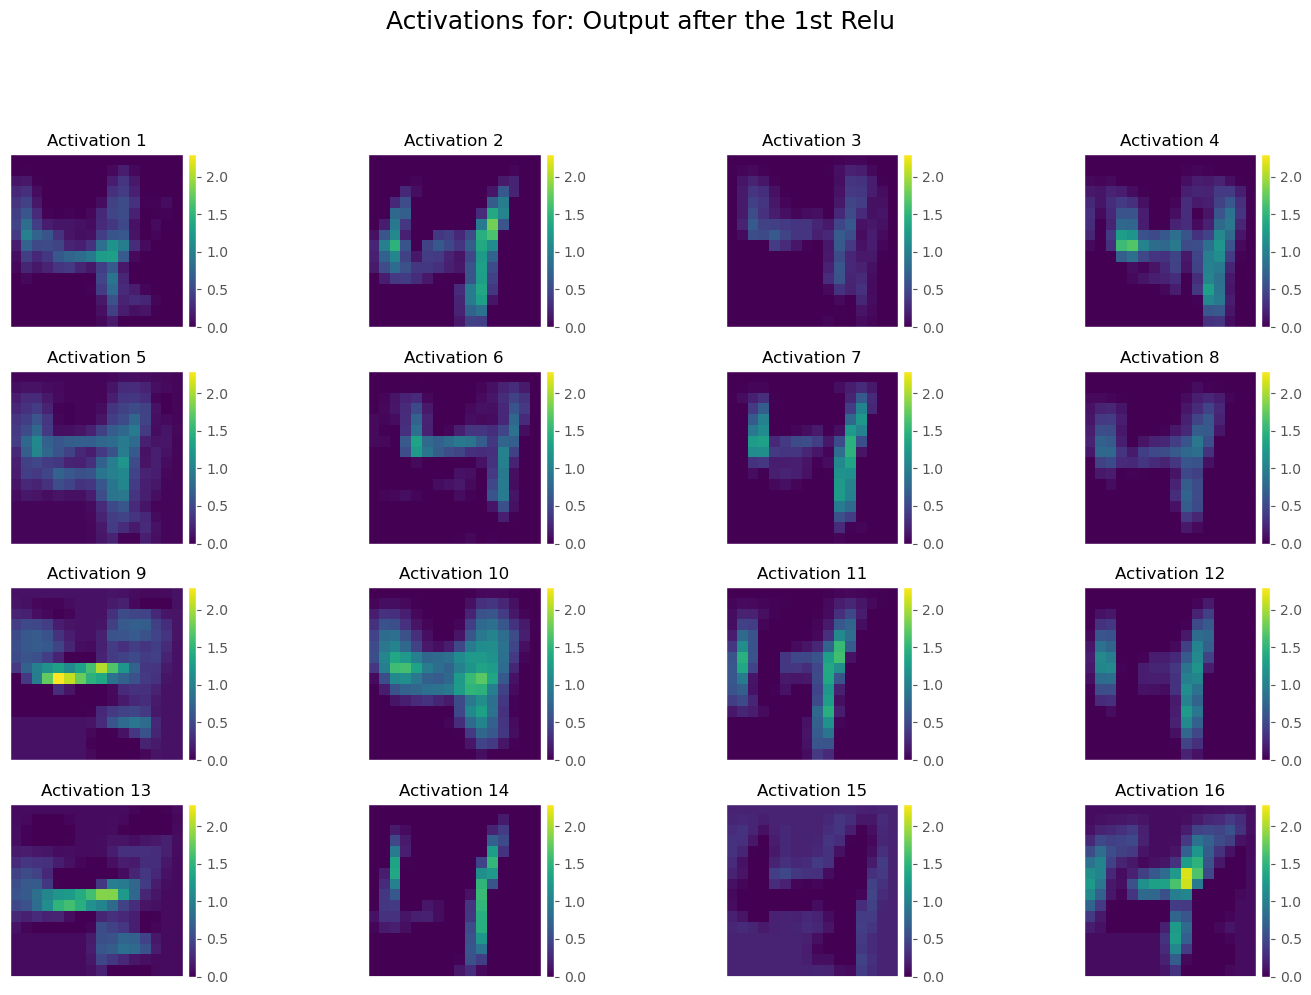

In [29]:
# Plot the outputs after the first Relu
plot_activations(out[1], number_rows=4, name="Output after the 1st Relu")

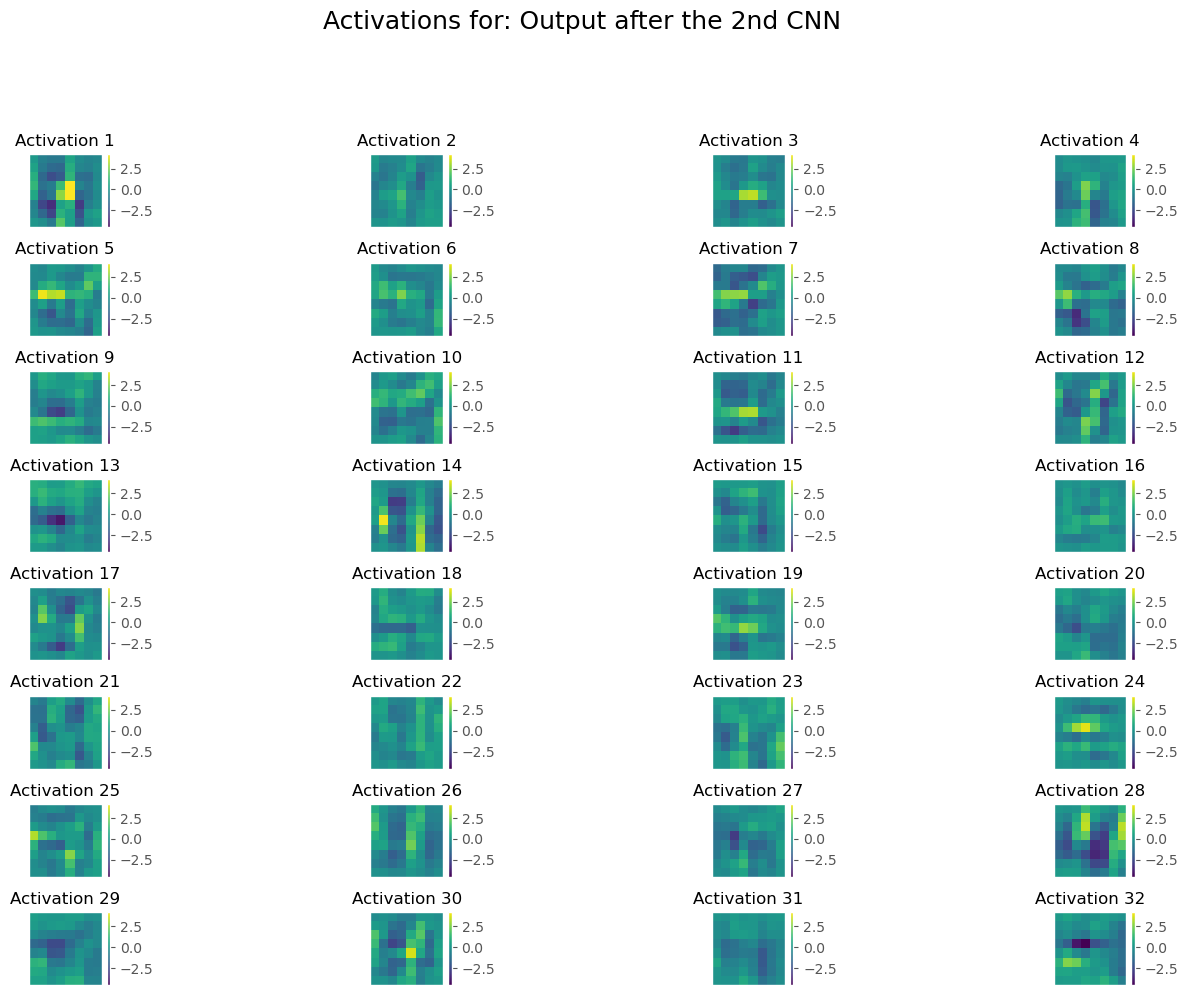

In [30]:
# Plot the outputs after the second CNN
plot_activations(out[2], number_rows=32 // 4, name="Output after the 2nd CNN")

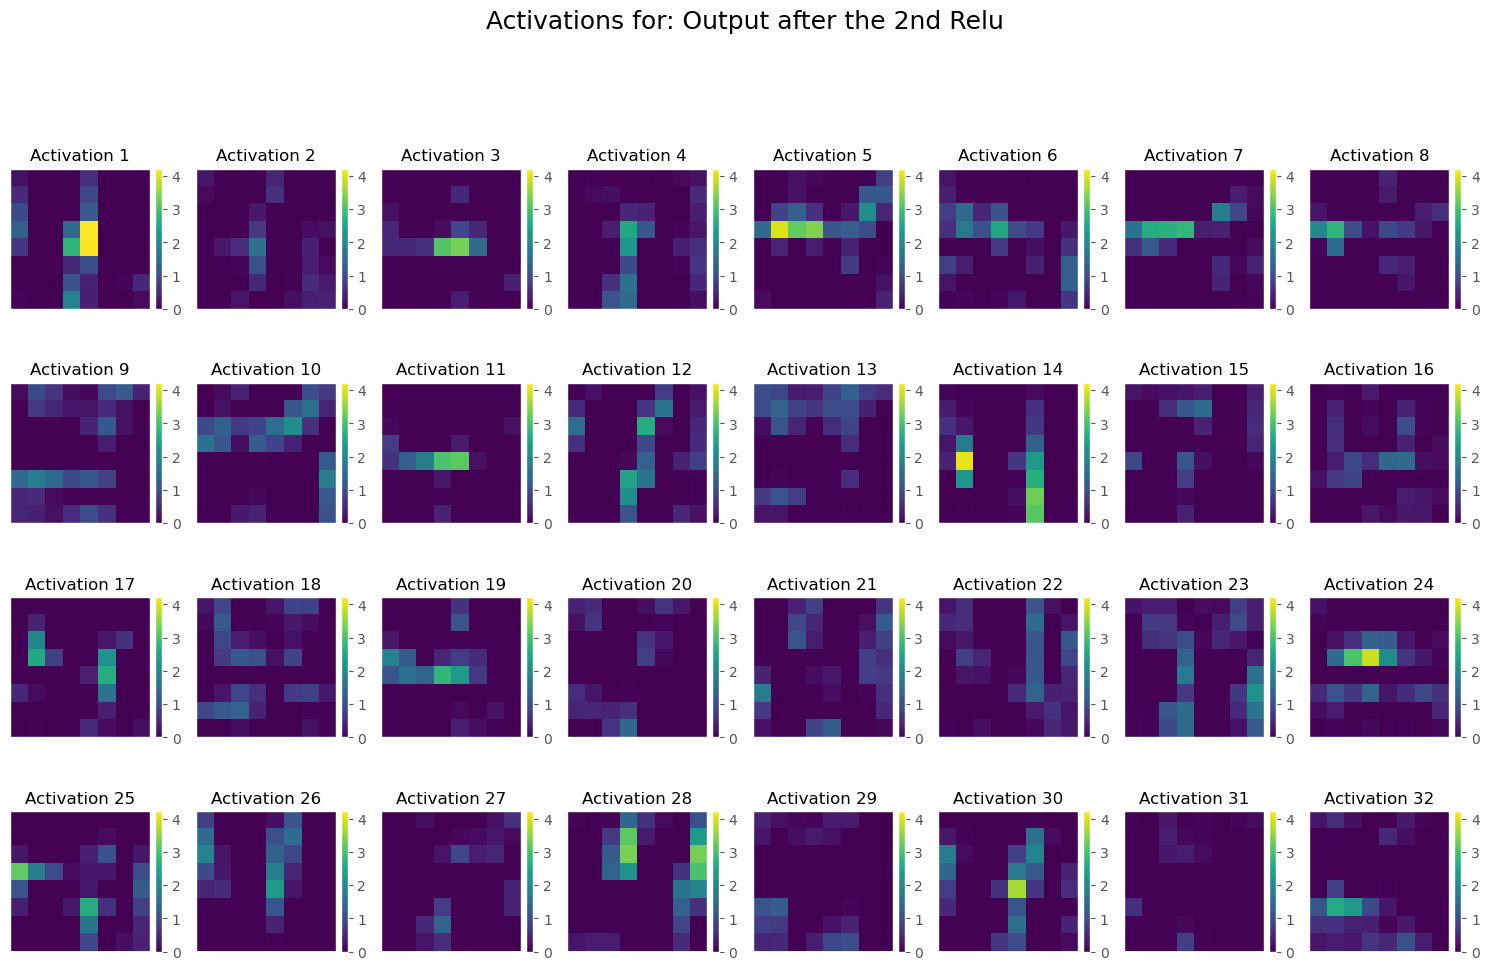

In [31]:
# Plot the outputs after the second Relu
plot_activations(out[3], number_rows=4, name="Output after the 2nd Relu")

Plot the first five misclassified samples:


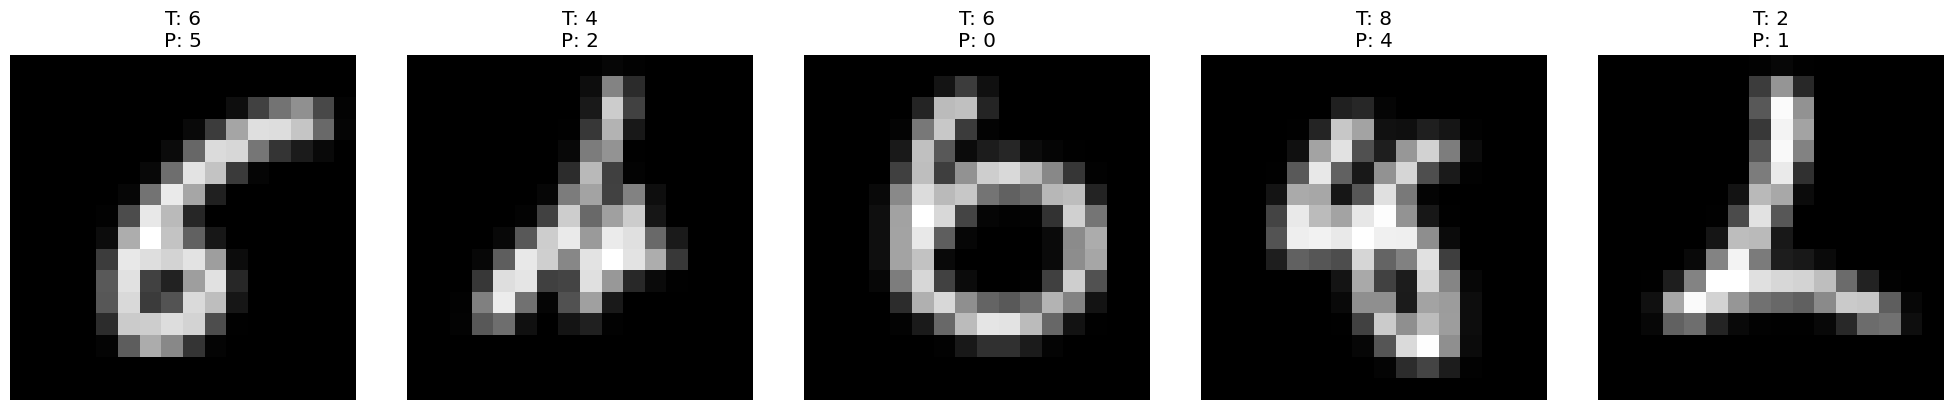

In [32]:
# Plot the misclassified samples

def show_data_on_ax(data, ax):
    img = data[0].squeeze().numpy()
    if img.ndim == 2:
        ax.imshow(img, cmap='gray')
    else:
        ax.imshow(img.permute(1, 2, 0))
    ax.axis('off') 

num_images_per_row = 5
misclassified_samples = []

for x, y in torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1):
    z = model(x)
    _, yhat = torch.max(z, 1)
    if yhat != y:
        misclassified_samples.append({'x': x, 'y_true': y, 'y_pred': yhat})
        if len(misclassified_samples) >= num_images_per_row:
            break

if misclassified_samples:

    fig, axes = plt.subplots(nrows=1, ncols=len(misclassified_samples), figsize=(20, 4))
    
    if len(misclassified_samples) == 1:
        axes = [axes]

    for i, sample in enumerate(misclassified_samples):

        show_data_on_ax((sample['x'], sample['y_true']), ax=axes[i])
        
        axes[i].set_title(f"T: {sample['y_true'].item()}\nP: {sample['y_pred'].item()}")
    
    plt.tight_layout()
    plt.show();

*** 
Author: Dr. Olga Khon, PhD in Finance